In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

soruces:https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams

In [2]:
df = pd.read_csv('exams.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
len(df)

1000

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df = pd.get_dummies(df)
df.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,67,67,63,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,40,59,55,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1
2,59,60,50,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
3,77,78,68,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
4,78,73,68,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0


<AxesSubplot:>

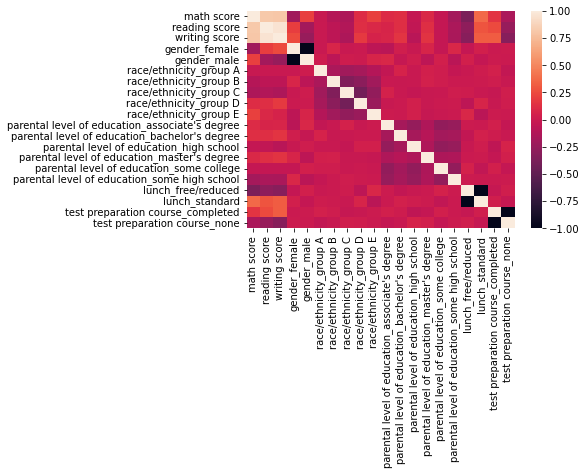

In [7]:
sns.heatmap(df.corr())

***DECISION TREE***

In [8]:
df.corr()['math score'].sort_values()


lunch_free/reduced                               -0.374431
gender_female                                    -0.200863
parental level of education_some high school     -0.179725
test preparation course_none                     -0.151704
race/ethnicity_group C                           -0.146533
race/ethnicity_group B                           -0.106384
parental level of education_high school          -0.038827
parental level of education_some college         -0.038123
race/ethnicity_group A                           -0.022464
parental level of education_master's degree       0.092484
parental level of education_associate's degree    0.102966
race/ethnicity_group D                            0.111121
parental level of education_bachelor's degree     0.117535
test preparation course_completed                 0.151704
gender_male                                       0.200863
race/ethnicity_group E                            0.203515
lunch_standard                                    0.3744

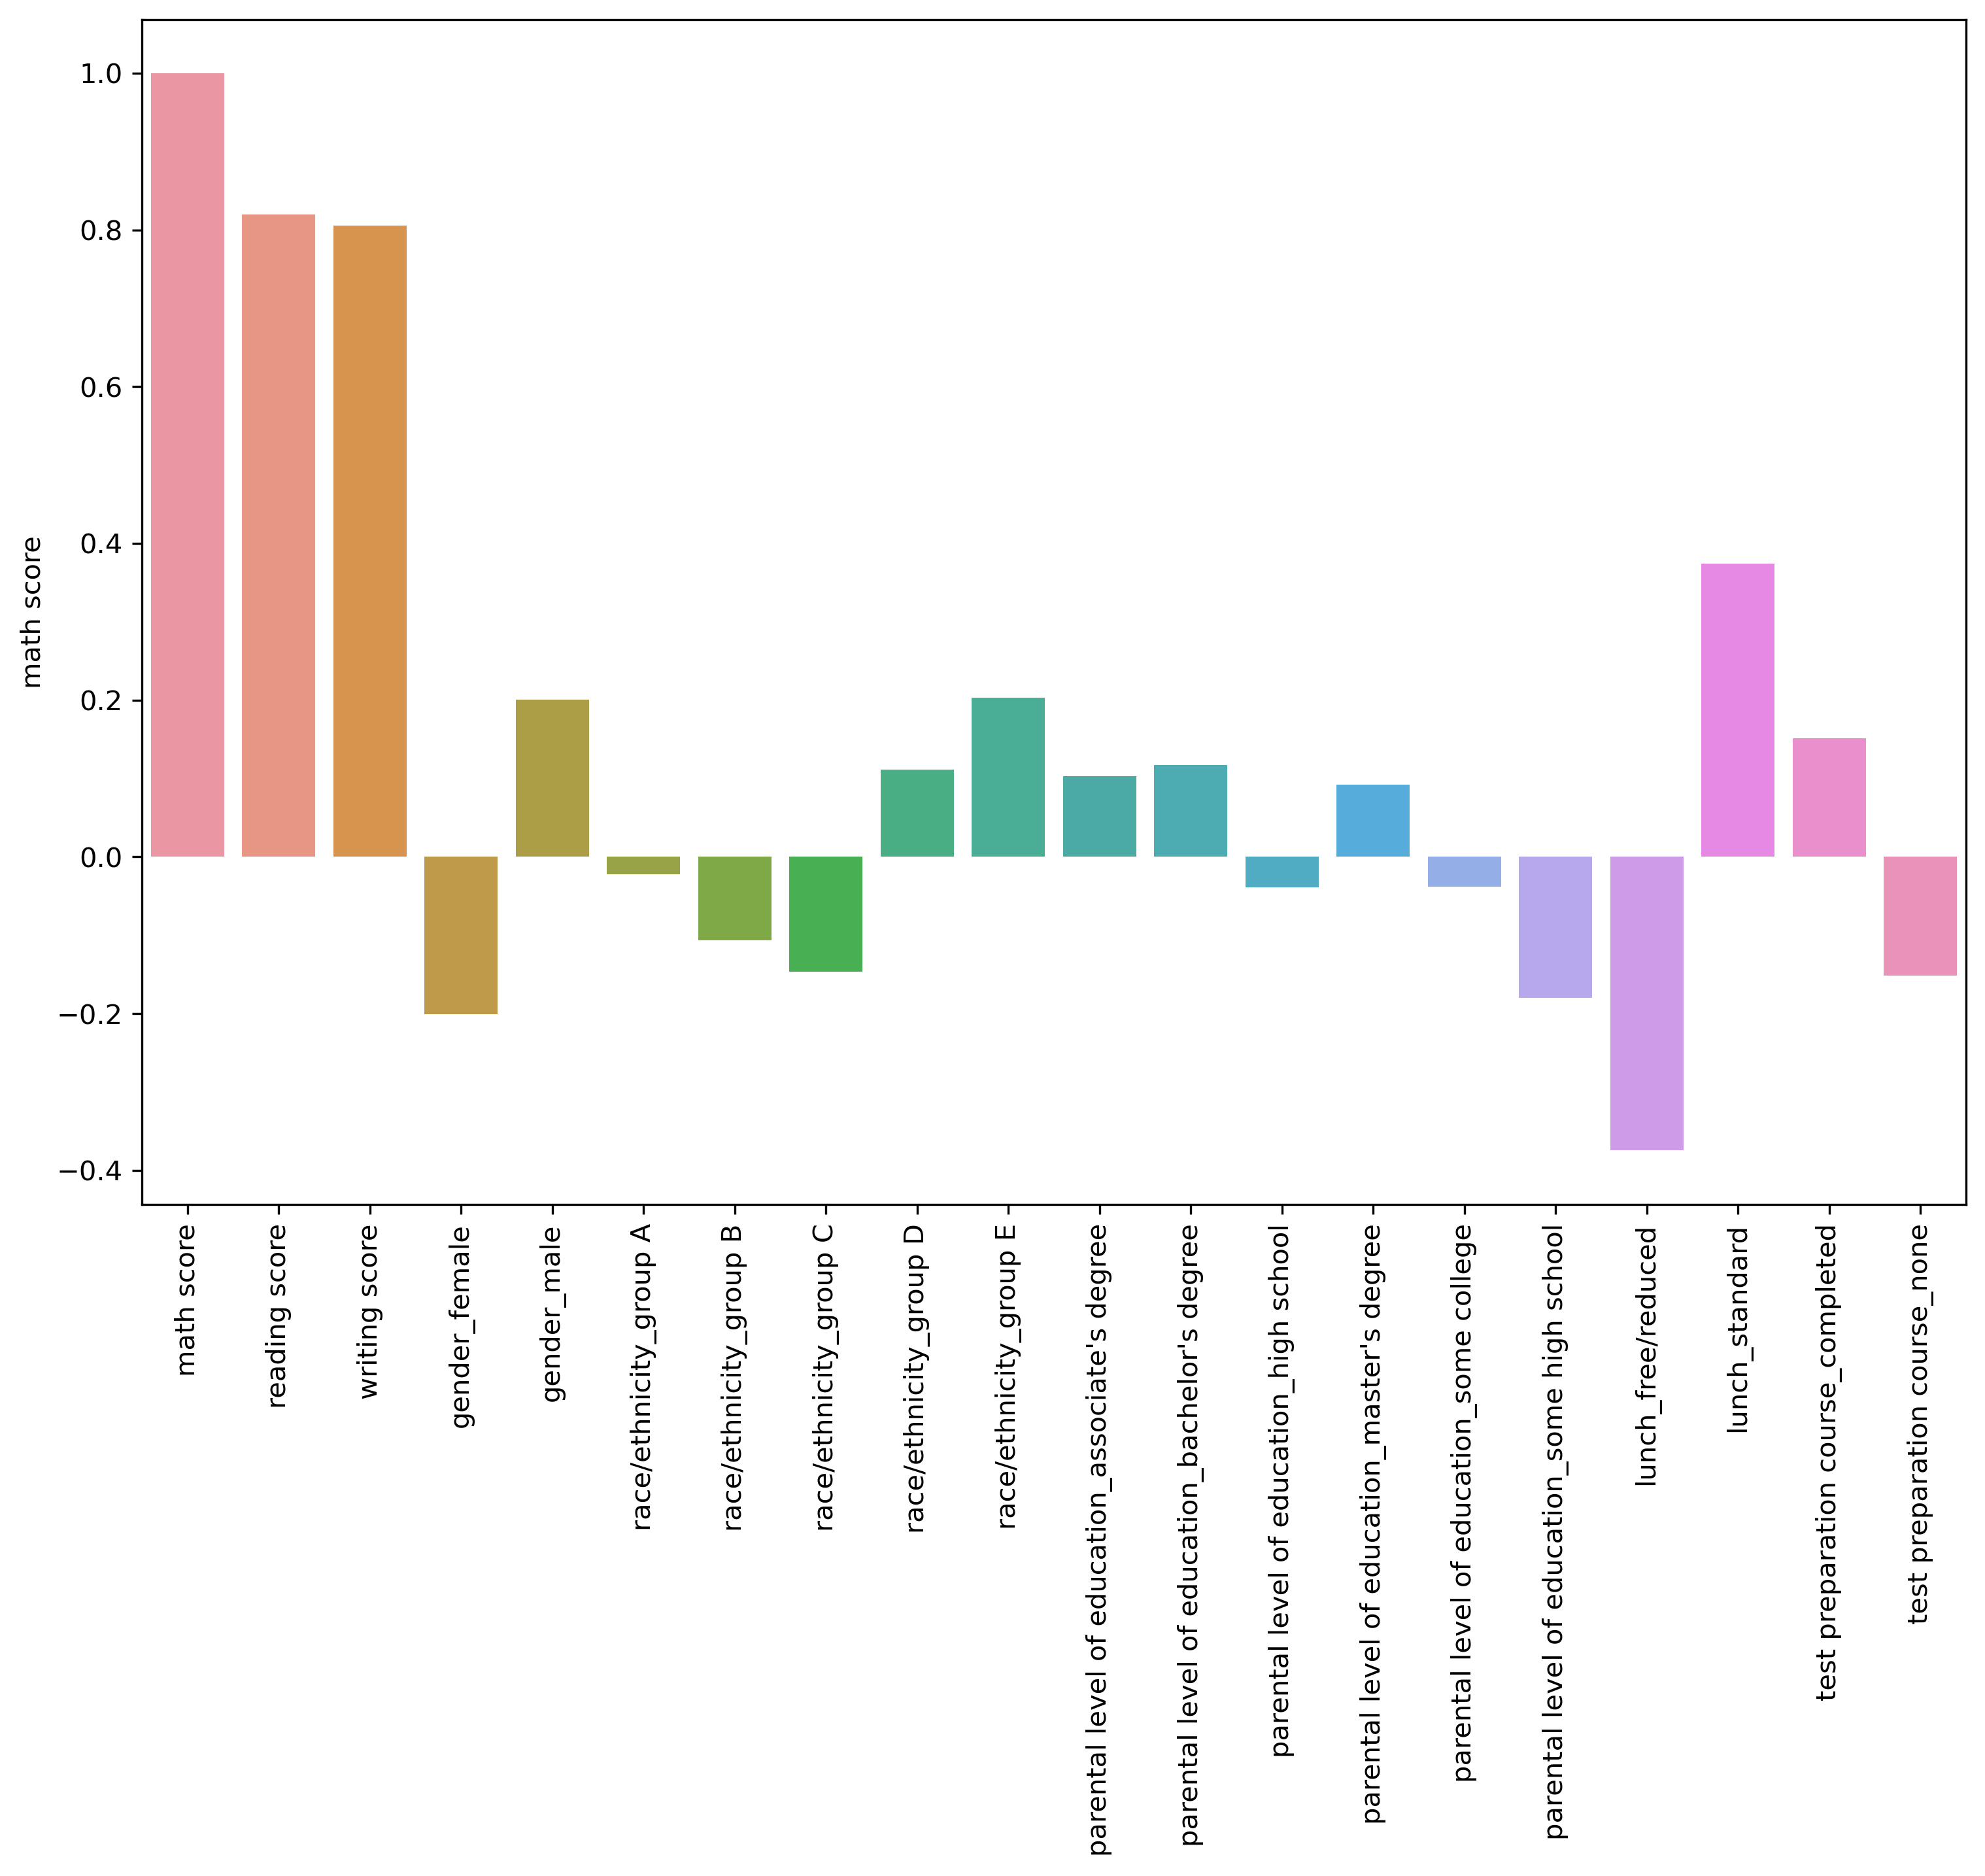

In [9]:
plt.figure(figsize=(12,8), dpi=300)
sns.barplot(x=df.columns,y=df.corr()['math score'])
plt.xticks(rotation=90);

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('math score',axis=1)
y = df['math score']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
grid_param = {'max_depth':[1,2,3,4,5,10,15,30,100]}

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
decision_tree = DecisionTreeRegressor()

In [20]:
grid_model = GridSearchCV(estimator=decision_tree,param_grid=grid_param, scoring='neg_mean_absolute_error')

In [21]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 10, 15, 30, 100]},
             scoring='neg_mean_absolute_error')

In [22]:
grid_model.best_params_

{'max_depth': 5}

In [23]:
y_pred = grid_model.predict(X_test_scaled)

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
mae = mean_absolute_error(y_test,y_pred)
mae

5.409402378107679

In [26]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

7.05987123622136

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='math score'>

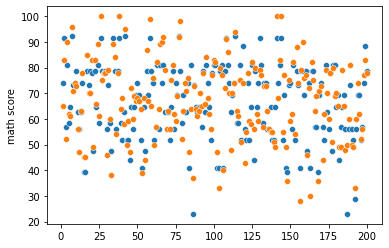

In [27]:
sns.scatterplot(range(1,201), y_pred)
sns.scatterplot(range(1,201), y_test)

***RANDOM FOREST***

In [28]:
df.corr()['reading score'].sort_values()

lunch_free/reduced                               -0.288282
test preparation course_none                     -0.245144
gender_male                                      -0.189389
parental level of education_some high school     -0.151530
race/ethnicity_group C                           -0.122770
race/ethnicity_group B                           -0.065486
parental level of education_high school          -0.054685
parental level of education_some college         -0.034704
race/ethnicity_group A                           -0.008849
parental level of education_associate's degree    0.067950
race/ethnicity_group E                            0.092907
parental level of education_master's degree       0.119698
parental level of education_bachelor's degree     0.120719
race/ethnicity_group D                            0.124821
gender_female                                     0.189389
test preparation course_completed                 0.245144
lunch_standard                                    0.2882

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


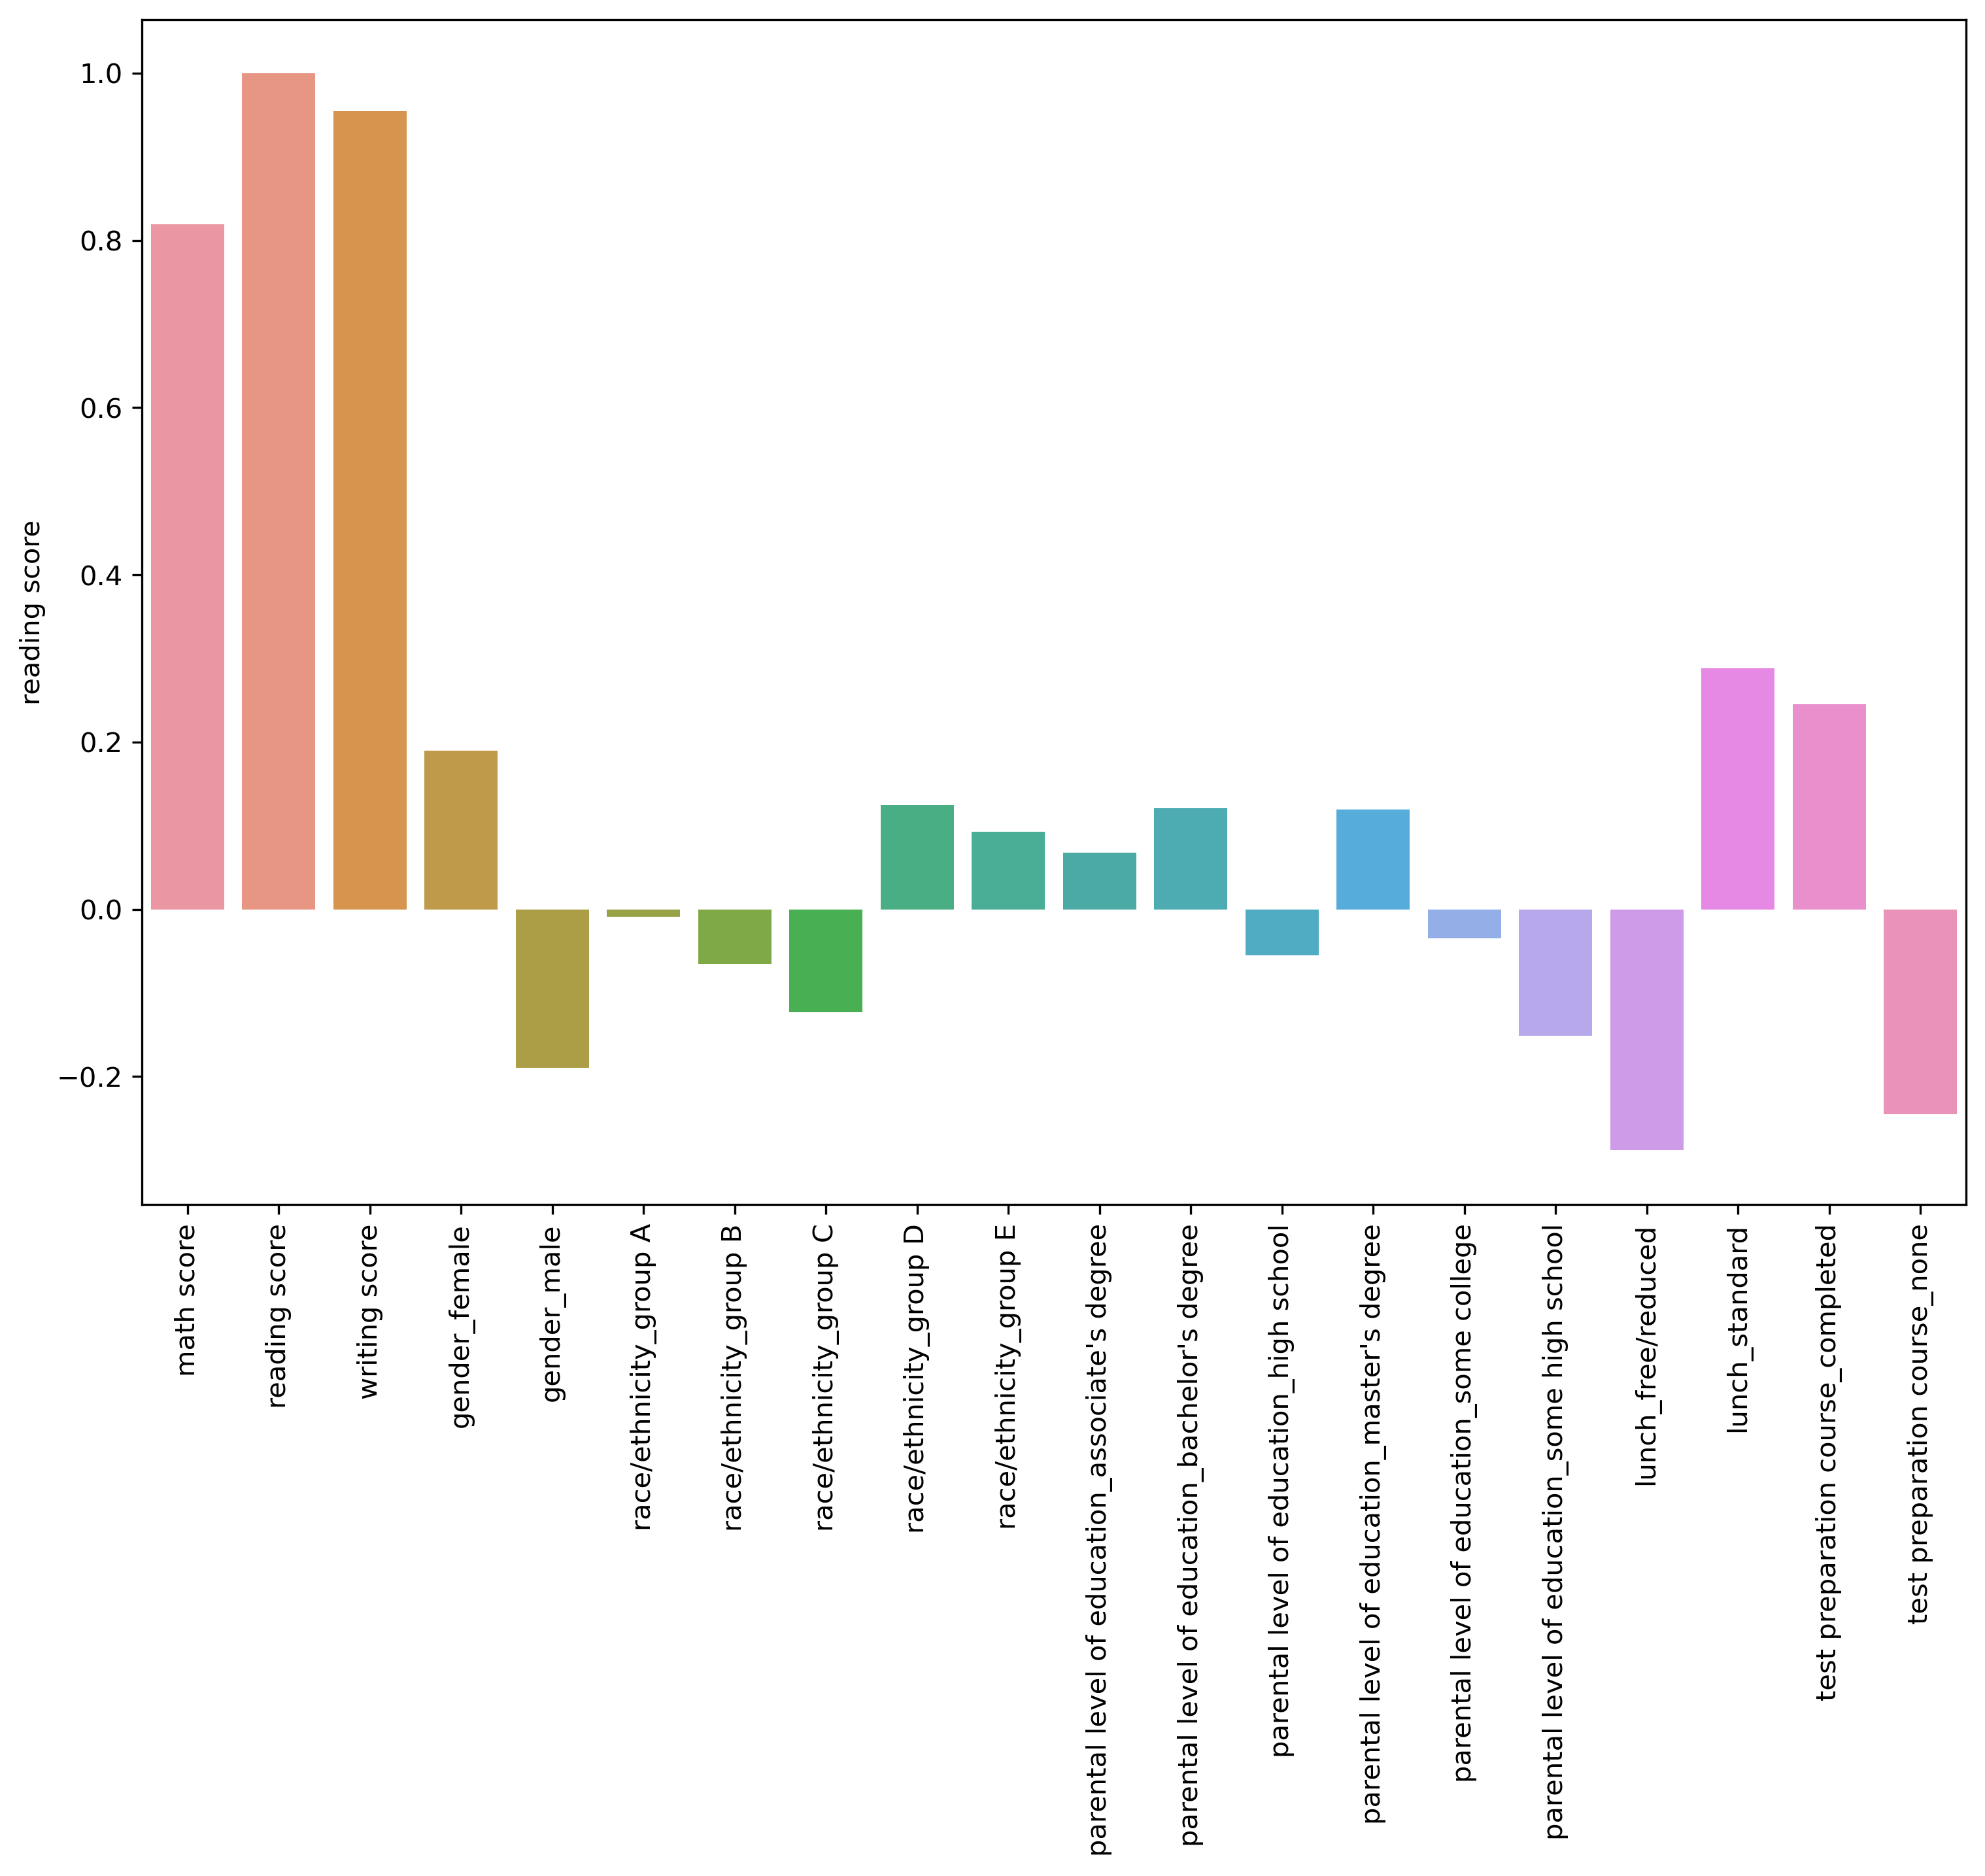

In [29]:
plt.figure(figsize=(12,8), dpi=300)
sns.barplot(df.columns, df.corr()['reading score'])
plt.xticks(rotation=90);

In [30]:
X = df.drop('reading score',axis=1)
y = df['reading score']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
random_forest = RandomForestRegressor()

In [34]:
grid_param = {'n_estimators':[1,10,50,100,200,500],'max_depth':[1,2,3,4,5,10]}

In [35]:
grid_model_2 = GridSearchCV(estimator=random_forest,param_grid=grid_param, scoring='neg_mean_absolute_error')

In [36]:
grid_model_2.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 10],
                         'n_estimators': [1, 10, 50, 100, 200, 500]},
             scoring='neg_mean_absolute_error')

In [37]:
grid_model_2.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [38]:
Y_pred = grid_model_2.predict(X_test)

In [39]:
mae = mean_absolute_error(y_test,y_pred)
mae

6.460161059265392

In [40]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

7.835621657655267

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='reading score'>

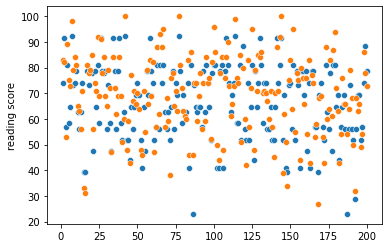

In [41]:
sns.scatterplot(range(1,201), y_pred)
sns.scatterplot(range(1,201), y_test)